In [1]:
# flake8: noqa

# Machine Learning Approaches for Magnetic Characterization
### Two-dimensional magnetic materials
Trevor David Rhone, Rensselaer Polytechnic Institute

Associated tutorial can be found on YouTube:
https://www.youtube.com/watch?v=yiyFQNWs2F4

In [2]:
# import python modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
# import all machine learning functions
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

In [4]:
# global variables
TEST_SIZE = 0.3
RANDOM_STATE = 42

### Download 2D magnetic materials formation energies data set:

Download data from :
https://archive.materialscloud.org/record/2019.0020/v1

Description of data and corresponding study can be found here:
https://www.nature.com/articles/s41598-020-72811-z

- save the file to your google drive (with colab) or your local drive (jupyter notebook).
- Can also upload from github: https://github.com/trevorguru/materials_informatics_tutorial

Verify mount and check path for the csv file. Change the path below as needed.

Open and load "magneticmoment_Ef_data.csv" using pandas.

In [5]:
df = pd.read_csv("../magnetic_materials_2d/data/magneticmoment_Ef_data.csv")

In [6]:
df.columns

Index(['Unnamed: 0', 'formation_energy', 'elem_frac', 'elem_list', 'energy',
       'formula', 'magnetic_moment', 'spin_index', 'num_p', 'num_d', 'num_f',
       'atomic_rad', 'atomic_vol', 'covalent_rad', 'dipole', 'eaffinity',
       'num_electrons', 'atomic_rad_sum_dif', 'atomic_rad_std_dif',
       'atomic_rad_std', 'atomic_rad_avg', 'atomic_rad_max_dif',
       'atomic_vol_sum_dif', 'atomic_vol_std_dif', 'atomic_vol_std',
       'atomic_vol_avg', 'atomic_vol_max_dif', 'covalentrad_sum_dif',
       'covalentrad_std_dif', 'covalentrad_std', 'covalentrad_avg',
       'covalentrad_max_dif', 'dipole_sum_dif', 'dipole_std_dif', 'dipole_std',
       'dipole_avg', 'dipole_max_dif', 'eaffinity_sum_dif',
       'eaffinity_std_dif', 'eaffinity_std', 'e_affinity_avg',
       'e_affinity_max_dif', 'numelectron_sum_dif', 'numelectron_std_dif',
       'numelectron_std', 'numelectron_avg', 'numelectron_max_dif',
       'vdwradius_sum_dif', 'vdwradius_std_dif', 'vdwradius_std',
       'vdwradius_a

In [7]:
df.head(n = 6)

,Unnamed: 0,formation_energy,elem_frac,elem_list,energy,formula,magnetic_moment,spin_index,num_p,num_d,...,Born,hardness_mean,hardness_var,Nup_mean,Nup_var,cs_bob,cs_PE,cs_IR,cs_AR,cs_OX
0,0,-1.152920,"[{Element Cr: 0.1}, {Element Co: 0.1}, {Elemen...","[Element Cr, Element Co, Element Ge, Element T...",-46.782036,Cr1Co1Ge1Te6P1,2.816,1,4,9,...,824.839369,3.676485,0.392730,3.20,2.1600,42880.10573,966.64,13.905000,11.50,4917162.56
1,1,-1.325311,"[{Element Cr: 0.1}, {Element Co: 0.1}, {Elemen...","[Element Cr, Element Co, Element Ge, Element Te]",-46.171992,Cr1Co1Ge2Te6,3.142,1,4,9,...,824.567397,3.378096,0.045734,3.25,2.6875,44357.76082,984.88,12.438333,11.35,5087200.04
2,2,-1.458288,"[{Element Cr: 0.1}, {Element Co: 0.1}, {Elemen...","[Element Cr, Element Co, Element Si, Element G...",-47.107590,Cr1Co1Si1Ge1Te6,3.149,1,4,9,...,824.559724,3.378693,0.036589,3.00,2.4000,42715.38977,991.35,13.955000,11.00,4806565.92
3,3,-1.389637,"[{Element Cr: 0.1}, {Element Co: 0.1}, {Elemen...","[Element Cr, Element Co, Element Si, Element T...",-47.821374,Cr1Co1Si1Te6P1,2.841,0,4,9,...,824.806360,3.686029,0.386545,3.20,2.1600,39337.73467,1035.21,13.728333,12.15,4902984.32
4,4,-1.620268,"[{Element Cr: 0.1}, {Element Co: 0.1}, {Elemen...","[Element Cr, Element Co, Element Si, Element Te]",-48.072190,Cr1Co1Si2Te6,3.156,1,4,9,...,824.544325,3.390026,0.045094,3.25,2.6875,37805.76082,1133.20,15.185000,13.15,5051754.44
5,5,-0.641226,"[{Element Cr: 0.1}, {Element Co: 0.1}, {Elemen...","[Element Cr, Element Co, Element Te, Element P]",-47.052778,Cr1Co1Te6P2,2.603,1,4,9,...,824.780003,3.762266,0.454121,3.50,2.2500,38071.76082,1058.38,15.065000,14.35,5340605.20


In [8]:
import sys

# Print the Python path
print(sys.path)

['/home/zhangt20/miniconda3/envs/magnetic-materials-2d_env/lib/python313.zip', '/home/zhangt20/miniconda3/envs/magnetic-materials-2d_env/lib/python3.13', '/home/zhangt20/miniconda3/envs/magnetic-materials-2d_env/lib/python3.13/lib-dynload', '', '/home/zhangt20/miniconda3/envs/magnetic-materials-2d_env/lib/python3.13/site-packages', '/home/zhangt20/magnetic-materials-2d/src']


In [9]:
import magnetic_materials_2d
print(magnetic_materials_2d.__file__)


/home/zhangt20/magnetic-materials-2d/src/magnetic_materials_2d/__init__.py


In [10]:
from magnetic_materials_2d.data.dictionaries import column_meaning_map, formation_energy_map, magnetic_moment_map

/home/zhangt20/magnetic-materials-2d/src/magnetic_materials_2d/data/dictionaries.py:10: SyntaxWarning: invalid escape sequence '\m'
  "magnetic_moment": "Magnetic moment per unit cell [\mathrm{\mu_B}]",
/home/zhangt20/magnetic-materials-2d/src/magnetic_materials_2d/data/dictionaries.py:15: SyntaxWarning: invalid escape sequence '\m'
  "atomic_rad": "Atomic radius of the atoms in the structure [\mathrm{\AA}]",
/home/zhangt20/magnetic-materials-2d/src/magnetic_materials_2d/data/dictionaries.py:16: SyntaxWarning: invalid escape sequence '\m'
  "atomic_vol": "Atomic volume of the atoms in the structure [\mathrm{\AA}^3]",
/home/zhangt20/magnetic-materials-2d/src/magnetic_materials_2d/data/dictionaries.py:17: SyntaxWarning: invalid escape sequence '\m'
  "covalent_rad": "Covalent radius of the atoms in the structure [\mathrm{\AA}]",
/home/zhangt20/magnetic-materials-2d/src/magnetic_materials_2d/data/dictionaries.py:18: SyntaxWarning: invalid escape sequence '\m'
  "dipole": "Dipole polarizab

In [11]:
# extract only the numeric descriptors
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.drop(columns = ["Unnamed: 0"], inplace = True)
print("There are", len(numeric_df.columns), "numeric descriptors.")
numeric_df.head(n = 6)

There are 72 numeric descriptors.


,formation_energy,energy,magnetic_moment,spin_index,num_p,num_d,num_f,atomic_rad_sum_dif,atomic_rad_std_dif,atomic_rad_std,...,Born,hardness_mean,hardness_var,Nup_mean,Nup_var,cs_bob,cs_PE,cs_IR,cs_AR,cs_OX
0,-1.152920,-46.782036,2.816,1,4,9,0,158.0,0.997877,0.008629,...,824.839369,3.676485,0.392730,3.20,2.1600,42880.10573,966.64,13.905000,11.50,4917162.56
1,-1.325311,-46.171992,3.142,1,4,9,0,168.0,0.831633,0.009426,...,824.567397,3.378096,0.045734,3.25,2.6875,44357.76082,984.88,12.438333,11.35,5087200.04
2,-1.458288,-47.107590,3.149,1,4,9,0,154.0,0.968081,0.007981,...,824.559724,3.378693,0.036589,3.00,2.4000,42715.38977,991.35,13.955000,11.00,4806565.92
3,-1.389637,-47.821374,2.841,0,4,9,0,148.0,1.305515,0.008867,...,824.806360,3.686029,0.386545,3.20,2.1600,39337.73467,1035.21,13.728333,12.15,4902984.32
4,-1.620268,-48.072190,3.156,1,4,9,0,160.5,1.087169,0.009983,...,824.544325,3.390026,0.045094,3.25,2.6875,37805.76082,1133.20,15.185000,13.15,5051754.44
5,-0.641226,-47.052778,2.603,1,4,9,0,160.5,1.226919,0.010809,...,824.780003,3.762266,0.454121,3.50,2.2500,38071.76082,1058.38,15.065000,14.35,5340605.20


In [12]:
from magnetic_materials_2d.utils import sorted_descriptors, top12

In [13]:
formation_energy_descriptors_linear = sorted_descriptors(numeric_df,
                                                         formation_energy_map["label"],
                                                         LinearRegression())
top12(formation_energy_descriptors_linear, column_meaning_map, "formation energy", "linear")

12 highest scored descriptors for formation energy using linear regression
--------------------------------------------------------------------------
 1. Maximum difference of dipole polarizability [\mathrm{\AA}^3] (score = 0.595)
 2. Standard deviation of d electrons [count] (score = 0.587)
 3. Sum of dipole polarizability differences [\mathrm{\AA}^3] (score = 0.534)
 4. Mean of dipole polarizability [\mathrm{\AA}^3] (score = 0.530)
 5. Standard deviation of dipole polarizability [\mathrm{\AA}^3] (score = 0.457)
 6. Skew of p electrons [dimensionless] (score = 0.427)
 7. Standard deviation of p electrons [count] (score = 0.427)
 8. Number of p electrons [count] (score = 0.427)
 9. Sum of differences of atomic volumes [\mathrm{\AA}^3] (score = 0.349)
10. Skew of d electrons [dimensionless] (score = 0.307)
11. Mean of valence electrons [count] (score = 0.295)
12. Oxidation number BoB flavor [dimensionless] (score = 0.284)


In [14]:
formation_energy_descriptors_rf = sorted_descriptors(numeric_df,
                                                     formation_energy_map["label"],
                                                     RandomForestRegressor(random_state = RANDOM_STATE))
top12(formation_energy_descriptors_rf, column_meaning_map, "formation energy", "random forest")

12 highest scored descriptors for formation energy using random forest regression
---------------------------------------------------------------------------------
 1. Standard deviation of valence electrons [count] (score = 0.882)
 2. Mean of valence electrons [count] (score = 0.793)
 3. Standard deviation of d electrons [count] (score = 0.765)
 4. Number of d electrons [count] (score = 0.742)
 5. Maximum difference of electron affinity [eV] (score = 0.731)
 6. Born-Haber term [not sure] (score = 0.728)
 7. Maximum difference of dipole polarizability [\mathrm{\AA}^3] (score = 0.717)
 8. Sum of dipole polarizability differences [\mathrm{\AA}^3] (score = 0.659)
 9. Skew of d electrons [dimensionless] (score = 0.644)
10. Mean of dipole polarizability [\mathrm{\AA}^3] (score = 0.525)
11. Sum of valence electron differences [count] (score = 0.479)
12. Standard deviation of dipole polarizability [\mathrm{\AA}^3] (score = 0.470)


In [15]:
formation_energy_descriptors_et = sorted_descriptors(numeric_df,
                                                     formation_energy_map["label"],
                                                     ExtraTreesRegressor(random_state = RANDOM_STATE))
top12(formation_energy_descriptors_et, column_meaning_map, "formation energy", "extra trees")

12 highest scored descriptors for formation energy using extra trees regression
-------------------------------------------------------------------------------
 1. Standard deviation of valence electrons [count] (score = 0.882)
 2. Mean of valence electrons [count] (score = 0.792)
 3. Number of d electrons [count] (score = 0.751)
 4. Standard deviation of d electrons [count] (score = 0.751)
 5. Maximum difference of electron affinity [eV] (score = 0.728)
 6. Maximum difference of dipole polarizability [\mathrm{\AA}^3] (score = 0.718)
 7. Born-Haber term [not sure] (score = 0.675)
 8. Skew of d electrons [dimensionless] (score = 0.654)
 9. Sum of dipole polarizability differences [\mathrm{\AA}^3] (score = 0.639)
10. Sum of valence electron differences [count] (score = 0.477)
11. Maximum difference of van der Waals radii [\mathrm{\AA}] (score = 0.467)
12. Maximum electronegativity difference [Pauling] (score = 0.467)


In [16]:
magnetic_moment_descriptors_linear = sorted_descriptors(numeric_df,
                                                        magnetic_moment_map["label"],
                                                        LinearRegression())
top12(magnetic_moment_descriptors_linear, column_meaning_map, "magnetic moment", "linear")

12 highest scored descriptors for magnetic moment using linear regression
-------------------------------------------------------------------------
 1. Skew of d electrons [dimensionless] (score = 0.497)
 2. Mean unpaired electrons [count] (score = 0.437)
 3. Sum of valence electron differences [count] (score = 0.351)
 4. Standard deviation of valence electrons [count] (score = 0.326)
 5. Maximum valence electron difference [count] (score = 0.300)
 6. DFT total energy [eV] (score = 0.234)
 7. Standard deviation of d electrons [count] (score = 0.200)
 8. Formation energy [eV] (score = 0.181)
 9. Number of d electrons [count] (score = 0.073)
10. Mean of valence electrons [count] (score = 0.037)
11. Standard deviation of valence electron differences [count] (score = 0.037)
12. Maximum difference of dipole polarizability [\mathrm{\AA}^3] (score = 0.025)


In [17]:
magnetic_moment_descriptors_rf = sorted_descriptors(numeric_df,
                                                    magnetic_moment_map["label"],
                                                    RandomForestRegressor(random_state = RANDOM_STATE))
top12(magnetic_moment_descriptors_rf, column_meaning_map, "magnetic moment", "random forest")

12 highest scored descriptors for magnetic moment using random forest regression
--------------------------------------------------------------------------------
 1. Mean of valence electrons [count] (score = 0.762)
 2. Standard deviation of valence electrons [count] (score = 0.656)
 3. Standard deviation of d electrons [count] (score = 0.602)
 4. Number of d electrons [count] (score = 0.595)
 5. Skew of d electrons [dimensionless] (score = 0.590)
 6. Sum of valence electron differences [count] (score = 0.400)
 7. Mean unpaired electrons [count] (score = 0.381)
 8. Mean of electron counts [count] (score = 0.322)
 9. Maximum valence electron difference [count] (score = 0.269)
10. Maximum difference of electron affinity [eV] (score = 0.264)
11. Variance of unpaired electrons [count$^2$] (score = 0.249)
12. Maximum difference of covalent radii [\mathrm{\AA}] (score = 0.241)


In [18]:
magnetic_moment_descriptors_et = sorted_descriptors(numeric_df,
                                                    magnetic_moment_map["label"],
                                                    ExtraTreesRegressor(random_state = RANDOM_STATE))
top12(magnetic_moment_descriptors_et, column_meaning_map, "magnetic moment", "extra trees")

12 highest scored descriptors for magnetic moment using extra trees regression
------------------------------------------------------------------------------
 1. Mean of valence electrons [count] (score = 0.766)
 2. Standard deviation of valence electrons [count] (score = 0.657)
 3. Number of d electrons [count] (score = 0.596)
 4. Standard deviation of d electrons [count] (score = 0.596)
 5. Skew of d electrons [dimensionless] (score = 0.595)
 6. Sum of valence electron differences [count] (score = 0.399)
 7. Mean unpaired electrons [count] (score = 0.379)
 8. Mean of electron counts [count] (score = 0.341)
 9. Maximum difference of covalent radii [\mathrm{\AA}] (score = 0.290)
10. Maximum valence electron difference [count] (score = 0.274)
11. Variance of unpaired electrons [count$^2$] (score = 0.262)
12. Maximum difference of electron affinity [eV] (score = 0.252)


In [19]:
from magnetic_materials_2d.utils import best_descriptors, print_best_descriptors

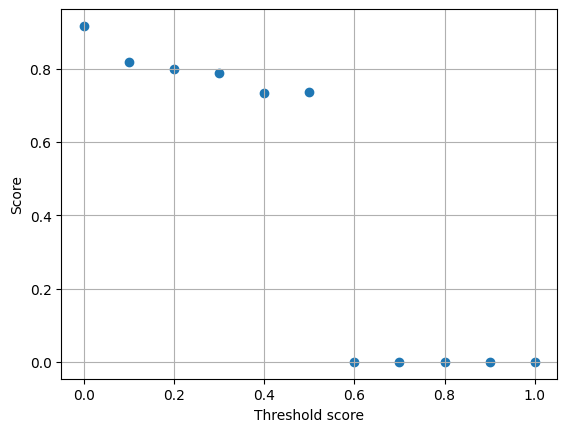

Optimum threshold = 0.000
Score = 0.916

Best descriptors for Formation energy [eV] using linear regression
------------------------------------------------------------------
Maximum difference of dipole polarizability [\mathrm{\AA}^3] (dipole_max_dif)
Standard deviation of d electrons [count] (cmpd_sigma_d)
Sum of dipole polarizability differences [\mathrm{\AA}^3] (dipole_sum_dif)
Mean of dipole polarizability [\mathrm{\AA}^3] (dipole_avg)
Standard deviation of dipole polarizability [\mathrm{\AA}^3] (dipole_std)
Skew of p electrons [dimensionless] (cmpd_skew_p)
Standard deviation of p electrons [count] (cmpd_sigma_p)
Number of p electrons [count] (num_p)
Sum of differences of atomic volumes [\mathrm{\AA}^3] (atomic_vol_sum_dif)
Skew of d electrons [dimensionless] (cmpd_skew_d)
Mean of valence electrons [count] (nvalence_avg)
Oxidation number BoB flavor [dimensionless] (cs_OX)
Mean unpaired electrons [count] (Nup_mean)
Standard deviation of atomic volumes [\mathrm{\AA}^3] (atomic_vol_s

In [20]:
best_formation_energy_descriptors_linear = best_descriptors(numeric_df,
                                                            formation_energy_descriptors_linear,
                                                            LinearRegression(),
                                                            formation_energy_map["label"])
print_best_descriptors(best_formation_energy_descriptors_linear,
                       column_meaning_map,
                       formation_energy_map["label"],
                       "linear regression")

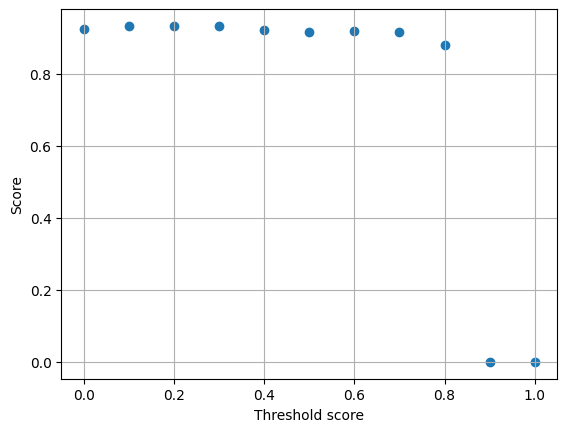

Optimum threshold = 0.100
Score = 0.934

Best descriptors for Formation energy [eV] using random forest
--------------------------------------------------------------
Standard deviation of valence electrons [count] (nvalence_std)
Mean of valence electrons [count] (nvalence_avg)
Standard deviation of d electrons [count] (cmpd_sigma_d)
Number of d electrons [count] (num_d)
Maximum difference of electron affinity [eV] (e_affinity_max_dif)
Born-Haber term [not sure] (Born)
Maximum difference of dipole polarizability [\mathrm{\AA}^3] (dipole_max_dif)
Sum of dipole polarizability differences [\mathrm{\AA}^3] (dipole_sum_dif)
Skew of d electrons [dimensionless] (cmpd_skew_d)
Mean of dipole polarizability [\mathrm{\AA}^3] (dipole_avg)
Sum of valence electron differences [count] (nvalence_sum_dif)
Standard deviation of dipole polarizability [\mathrm{\AA}^3] (dipole_std)
Mean of electron counts [count] (numelectron_avg)
Standard deviation of valence electron differences [count] (nvalence_std_dif

In [21]:
best_formation_energy_descriptors_rf = best_descriptors(numeric_df,
                                                        formation_energy_descriptors_rf,
                                                        RandomForestRegressor(random_state = RANDOM_STATE),
                                                        formation_energy_map["label"])
print_best_descriptors(best_formation_energy_descriptors_rf,
                       column_meaning_map,
                       formation_energy_map["label"],
                       "random forest")

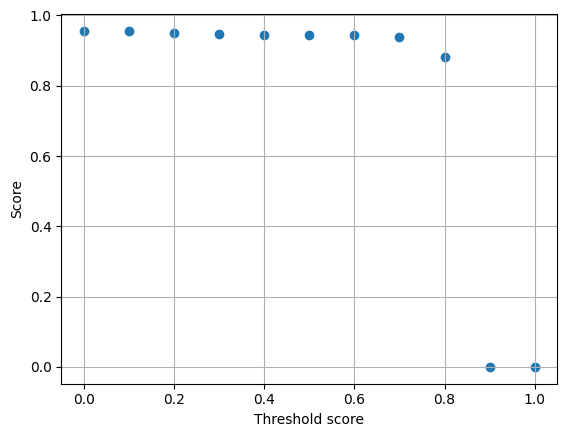

Optimum threshold = 0.100
Score = 0.956

Best descriptors for Formation energy [eV] using extra trees
------------------------------------------------------------
Standard deviation of valence electrons [count] (nvalence_std)
Mean of valence electrons [count] (nvalence_avg)
Standard deviation of d electrons [count] (cmpd_sigma_d)
Number of d electrons [count] (num_d)
Maximum difference of electron affinity [eV] (e_affinity_max_dif)
Born-Haber term [not sure] (Born)
Maximum difference of dipole polarizability [\mathrm{\AA}^3] (dipole_max_dif)
Sum of dipole polarizability differences [\mathrm{\AA}^3] (dipole_sum_dif)
Skew of d electrons [dimensionless] (cmpd_skew_d)
Mean of dipole polarizability [\mathrm{\AA}^3] (dipole_avg)
Sum of valence electron differences [count] (nvalence_sum_dif)
Standard deviation of dipole polarizability [\mathrm{\AA}^3] (dipole_std)
Mean of electron counts [count] (numelectron_avg)
Standard deviation of valence electron differences [count] (nvalence_std_dif)
Me

In [22]:
best_formation_energy_descriptors_et = best_descriptors(numeric_df,
                                                        formation_energy_descriptors_et,
                                                        ExtraTreesRegressor(random_state = RANDOM_STATE),
                                                        formation_energy_map["label"])
print_best_descriptors(best_formation_energy_descriptors_rf,
                       column_meaning_map,
                       formation_energy_map["label"],
                       "extra trees")

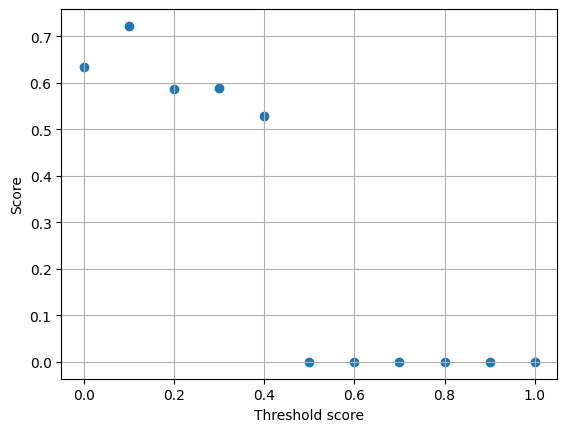

Optimum threshold = 0.100
Score = 0.722

Best descriptors for Magnetic moment per unit cell [\mathrm{\mu_B}] using linear regression
-------------------------------------------------------------------------------------------
Skew of d electrons [dimensionless] (cmpd_skew_d)
Mean unpaired electrons [count] (Nup_mean)
Sum of valence electron differences [count] (nvalence_sum_dif)
Standard deviation of valence electrons [count] (nvalence_std)
Maximum valence electron difference [count] (nvalence_max_dif)
DFT total energy [eV] (energy)
Standard deviation of d electrons [count] (cmpd_sigma_d)
Formation energy [eV] (formation_energy)
total: 8


In [23]:
best_magnetic_moment_descriptors_linear = best_descriptors(numeric_df,
                                                           magnetic_moment_descriptors_linear,
                                                           LinearRegression(),
                                                           magnetic_moment_map["label"])
print_best_descriptors(best_magnetic_moment_descriptors_linear,
                       column_meaning_map,
                       magnetic_moment_map["label"],
                       "linear regression")

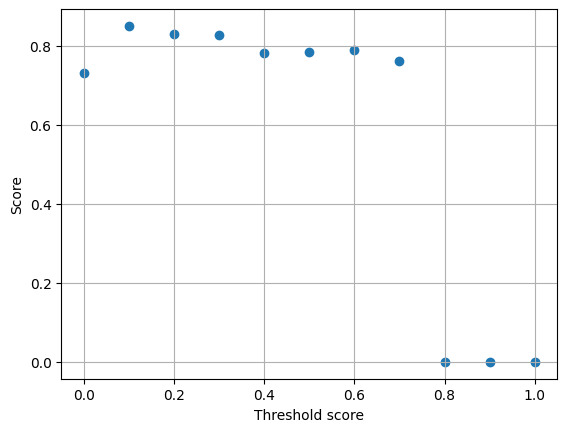

Optimum threshold = 0.100
Score = 0.851

Best descriptors for Magnetic moment per unit cell [\mathrm{\mu_B}] using random forest
---------------------------------------------------------------------------------------
Mean of valence electrons [count] (nvalence_avg)
Standard deviation of valence electrons [count] (nvalence_std)
Standard deviation of d electrons [count] (cmpd_sigma_d)
Number of d electrons [count] (num_d)
Skew of d electrons [dimensionless] (cmpd_skew_d)
Sum of valence electron differences [count] (nvalence_sum_dif)
Mean unpaired electrons [count] (Nup_mean)
Mean of electron counts [count] (numelectron_avg)
Maximum valence electron difference [count] (nvalence_max_dif)
Maximum difference of electron affinity [eV] (e_affinity_max_dif)
Variance of unpaired electrons [count$^2$] (Nup_var)
Maximum difference of covalent radii [\mathrm{\AA}] (covalentrad_max_dif)
Maximum difference of electron counts [count] (numelectron_max_dif)
Maximum difference of dipole polarizability [\

In [24]:
best_magnetic_moment_descriptors_rf = best_descriptors(numeric_df,
                                                       magnetic_moment_descriptors_rf,
                                                       RandomForestRegressor(random_state = RANDOM_STATE),
                                                       magnetic_moment_map["label"])
print_best_descriptors(best_magnetic_moment_descriptors_rf,
                       column_meaning_map,
                       magnetic_moment_map["label"],
                       "random forest")

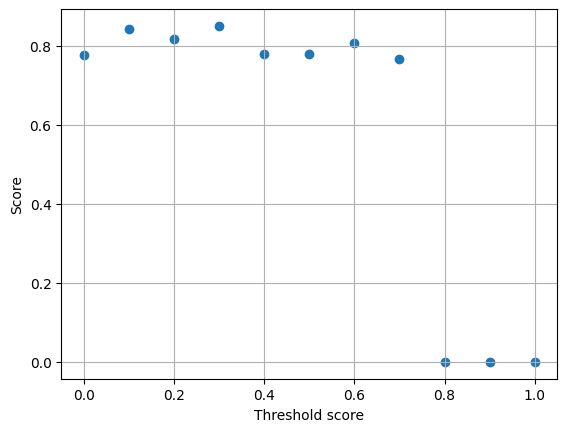

Optimum threshold = 0.300
Score = 0.851

Best descriptors for Magnetic moment per unit cell [\mathrm{\mu_B}] using extra trees
-------------------------------------------------------------------------------------
Mean of valence electrons [count] (nvalence_avg)
Standard deviation of valence electrons [count] (nvalence_std)
Number of d electrons [count] (num_d)
Standard deviation of d electrons [count] (cmpd_sigma_d)
Skew of d electrons [dimensionless] (cmpd_skew_d)
Sum of valence electron differences [count] (nvalence_sum_dif)
Mean unpaired electrons [count] (Nup_mean)
Mean of electron counts [count] (numelectron_avg)
total: 8


In [25]:
best_magnetic_moment_descriptors_et = best_descriptors(numeric_df,
                                                       magnetic_moment_descriptors_et,
                                                       ExtraTreesRegressor(random_state = RANDOM_STATE),
                                                       magnetic_moment_map["label"])
print_best_descriptors(best_magnetic_moment_descriptors_et,
                       column_meaning_map,
                       magnetic_moment_map["label"],
                       "extra trees")

In [26]:
from magnetic_materials_2d.utils import important_descriptors

In [27]:
important_descriptors_formation_energy_rf = important_descriptors(numeric_df,
                                                                  formation_energy_map["label"],
                                                                  RandomForestRegressor(random_state = RANDOM_STATE))

(dipole_avg, 0.456)
(cmpd_sigma_d, 0.116)
(dipole_max_dif, 0.063)
(cs_OX, 0.056)
(Nup_mean, 0.043)
(num_d, 0.031)
(nvalence_avg, 0.024)
(atomic_vol_max_dif, 0.021)
(atomic_vol_sum_dif, 0.015)
(atomic_rad_avg, 0.014)
(dipole_sum_dif, 0.014)
(atomic_vol_std, 0.011)
(magnetic_moment, 0.010)
(e_affinity_avg, 0.009)
(energy, 0.008)
(atomic_rad_std, 0.007)
(covalentrad_avg, 0.007)
(eaffinity_sum_dif, 0.006)
(covalentrad_max_dif, 0.006)
(eaffinity_std, 0.005)
(Born, 0.004)
(hardness_mean, 0.004)
(e_affinity_max_dif, 0.004)
(cs_IR, 0.004)
(covalentrad_std_dif, 0.003)
(cmpd_skew_d, 0.003)
(nvalence_sum_dif, 0.003)
(covalentrad_sum_dif, 0.003)
(vdwradius_avg, 0.003)
(nvalence_std_dif, 0.003)
(numelectron_avg, 0.003)
(atomic_rad_sum_dif, 0.002)
(atomic_rad_std_dif, 0.002)
(dipole_std, 0.002)
(eaffinity_std_dif, 0.002)
(atomic_vol_avg, 0.002)
(atomic_rad_max_dif, 0.002)
(dipole_std_dif, 0.002)
(nvalence_std, 0.002)
(Nup_var, 0.002)
(numelectron_std_dif, 0.002)
(numelectron_sum_dif, 0.002)
(std_ion

In [28]:
important_descriptors_formation_energy_et = important_descriptors(numeric_df,
                                                                  formation_energy_map["label"],
                                                                  ExtraTreesRegressor(random_state = RANDOM_STATE))

(nvalence_avg, 0.178)
(dipole_avg, 0.131)
(dipole_max_dif, 0.082)
(cmpd_sigma_d, 0.081)
(dipole_sum_dif, 0.080)
(num_d, 0.078)
(cmpd_skew_d, 0.042)
(Nup_mean, 0.036)
(cs_OX, 0.027)
(e_affinity_max_dif, 0.024)
(num_p, 0.022)
(nvalence_sum_dif, 0.018)
(covalentrad_max_dif, 0.014)
(covalentrad_sum_dif, 0.012)
(nvalence_std, 0.012)
(magnetic_moment, 0.011)
(atomic_vol_max_dif, 0.011)
(atomic_rad_avg, 0.010)
(energy, 0.009)
(atomic_rad_max_dif, 0.008)
(nvalence_max_dif, 0.008)
(covalentrad_std, 0.007)
(e_negativity_avg, 0.006)
(atomic_vol_sum_dif, 0.006)
(dipole_std, 0.005)
(nvalence_std_dif, 0.005)
(Born, 0.005)
(vdwradius_avg, 0.005)
(eaffinity_sum_dif, 0.004)
(atomic_vol_std, 0.004)
(covalentrad_avg, 0.004)
(e_affinity_avg, 0.004)
(eaffinity_std_dif, 0.004)
(cs_bob, 0.003)
(atomic_rad_sum_dif, 0.003)
(atomic_rad_std, 0.003)
(eaffinity_std, 0.003)
(numelectron_max_dif, 0.003)
(atomic_vol_avg, 0.002)
(numelectron_sum_dif, 0.002)
(dipole_std_dif, 0.002)
(atomic_rad_std_dif, 0.002)
(e_negati

In [29]:
important_descriptors_magnetic_moment_rf = important_descriptors(numeric_df,
                                                                 magnetic_moment_map["label"],
                                                                 RandomForestRegressor(random_state = RANDOM_STATE))

(Nup_mean, 0.158)
(cmpd_sigma_d, 0.090)
(cmpd_skew_d, 0.089)
(nvalence_std_dif, 0.073)
(nvalence_std, 0.052)
(nvalence_avg, 0.042)
(dipole_std_dif, 0.039)
(numelectron_std_dif, 0.038)
(e_affinity_avg, 0.027)
(spin_index, 0.026)
(std_ion, 0.018)
(e_negativity_std_dif, 0.017)
(formation_energy, 0.017)
(vdwradius_sum_dif, 0.014)
(Nup_var, 0.014)
(nvalence_sum_dif, 0.014)
(atomic_vol_sum_dif, 0.014)
(dipole_avg, 0.013)
(vdwradius_std_dif, 0.013)
(sum_ion, 0.012)
(Born, 0.012)
(e_negativity_max_dif, 0.011)
(atomic_vol_avg, 0.010)
(e_negativity_sum_dif, 0.010)
(dipole_sum_dif, 0.009)
(numelectron_avg, 0.009)
(hardness_var, 0.009)
(e_negativity_std, 0.009)
(atomic_rad_std, 0.009)
(eaffinity_std, 0.008)
(atomic_rad_sum_dif, 0.008)
(num_d, 0.007)
(vdwradius_std, 0.007)
(cs_OX, 0.007)
(covalentrad_std, 0.006)
(atomic_rad_std_dif, 0.006)
(e_negativity_avg, 0.005)
(eaffinity_sum_dif, 0.005)
(eaffinity_std_dif, 0.005)
(hardness_mean, 0.005)
(dipole_std, 0.004)
(cs_IR, 0.004)
(numelectron_sum_dif, 0

In [30]:
important_descriptors_magnetic_moment_et = important_descriptors(numeric_df,
                                                                 magnetic_moment_map["label"],
                                                                 ExtraTreesRegressor(random_state = RANDOM_STATE))

(spin_index, 0.154)
(cmpd_skew_d, 0.087)
(nvalence_avg, 0.079)
(cmpd_sigma_d, 0.072)
(Nup_mean, 0.061)
(nvalence_std_dif, 0.046)
(nvalence_sum_dif, 0.041)
(nvalence_max_dif, 0.030)
(nvalence_std, 0.028)
(Nup_var, 0.024)
(dipole_max_dif, 0.022)
(formation_energy, 0.022)
(sum_ion, 0.022)
(dipole_avg, 0.019)
(num_d, 0.018)
(dipole_sum_dif, 0.016)
(covalentrad_max_dif, 0.015)
(numelectron_max_dif, 0.013)
(Born, 0.013)
(dipole_std_dif, 0.012)
(e_affinity_max_dif, 0.012)
(numelectron_sum_dif, 0.011)
(eaffinity_sum_dif, 0.010)
(e_affinity_avg, 0.008)
(atomic_vol_avg, 0.008)
(vdwradius_max_dif, 0.008)
(atomic_vol_sum_dif, 0.007)
(e_negativity_max_dif, 0.007)
(numelectron_avg, 0.007)
(cs_OX, 0.006)
(numelectron_std_dif, 0.006)
(cs_bob, 0.006)
(eaffinity_std, 0.006)
(covalentrad_std_dif, 0.006)
(vdwradius_std_dif, 0.006)
(e_negativity_std, 0.005)
(vdwradius_sum_dif, 0.005)
(atomic_vol_std, 0.005)
(mean_ion, 0.005)
(atomic_rad_std_dif, 0.005)
(e_negativity_std_dif, 0.005)
(dipole_std, 0.004)
(ato

In [31]:
from magnetic_materials_2d.utils import optimum_importance
from magnetic_materials_2d.utils import print_important_descriptors

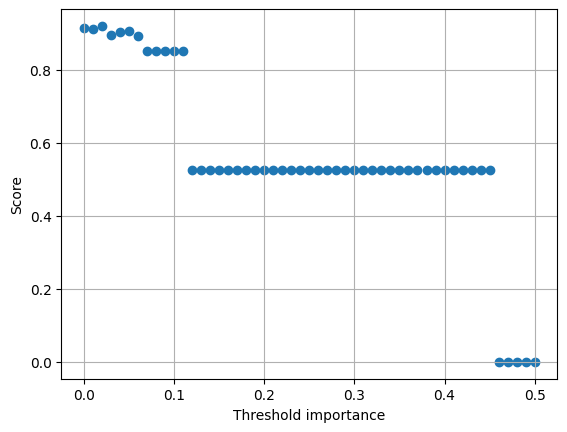

Optimum importance = 0.020
Score = 0.919

Important descriptors for Formation energy [eV] using random forest
-------------------------------------------------------------------
Mean of dipole polarizability [\mathrm{\AA}^3] (dipole_avg)
Standard deviation of d electrons [count] (cmpd_sigma_d)
Maximum difference of dipole polarizability [\mathrm{\AA}^3] (dipole_max_dif)
Oxidation number BoB flavor [dimensionless] (cs_OX)
Mean unpaired electrons [count] (Nup_mean)
Number of d electrons [count] (num_d)
Mean of valence electrons [count] (nvalence_avg)
Maximum difference of atomic volumes [\mathrm{\AA}^3] (atomic_vol_max_dif)
total: 8


In [32]:
optimum_importance_descriptors_formation_energy_rf = optimum_importance(numeric_df,
                                                                        important_descriptors_formation_energy_rf,
                                                                        RandomForestRegressor(random_state = RANDOM_STATE),
                                                                        formation_energy_map["label"])
print_important_descriptors(optimum_importance_descriptors_formation_energy_rf,
                       column_meaning_map,
                       formation_energy_map["label"],
                       "random forest")

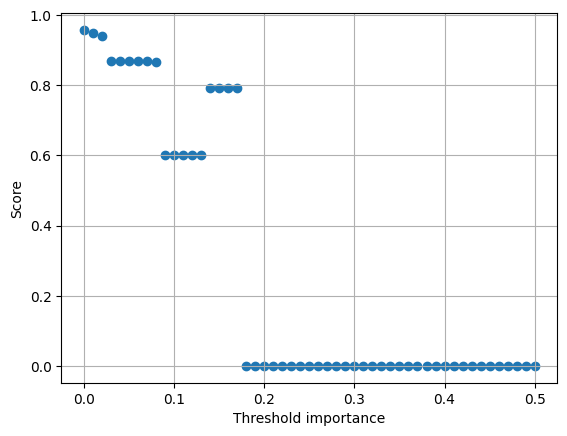

Optimum importance = 0.000
Score = 0.958

Important descriptors for Formation energy [eV] using extra trees
-----------------------------------------------------------------
Mean of valence electrons [count] (nvalence_avg)
Mean of dipole polarizability [\mathrm{\AA}^3] (dipole_avg)
Maximum difference of dipole polarizability [\mathrm{\AA}^3] (dipole_max_dif)
Standard deviation of d electrons [count] (cmpd_sigma_d)
Sum of dipole polarizability differences [\mathrm{\AA}^3] (dipole_sum_dif)
Number of d electrons [count] (num_d)
Skew of d electrons [dimensionless] (cmpd_skew_d)
Mean unpaired electrons [count] (Nup_mean)
Oxidation number BoB flavor [dimensionless] (cs_OX)
Maximum difference of electron affinity [eV] (e_affinity_max_dif)
Number of p electrons [count] (num_p)
Sum of valence electron differences [count] (nvalence_sum_dif)
Maximum difference of covalent radii [\mathrm{\AA}] (covalentrad_max_dif)
Sum of differences of covalent radii [\mathrm{\AA}] (covalentrad_sum_dif)
Standard 

In [33]:
optimum_importance_descriptors_formation_energy_et = optimum_importance(numeric_df,
                                                                        important_descriptors_formation_energy_et,
                                                                        ExtraTreesRegressor(random_state = RANDOM_STATE),
                                                                        formation_energy_map["label"])
print_important_descriptors(optimum_importance_descriptors_formation_energy_et,
                       column_meaning_map,
                       formation_energy_map["label"],
                       "extra trees")

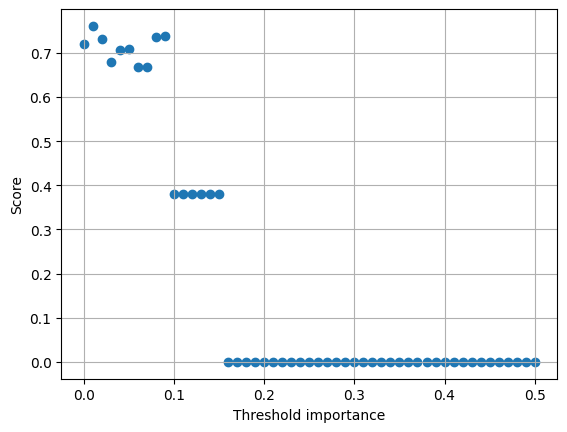

Optimum importance = 0.010
Score = 0.761

Important descriptors for Magnetic moment per unit cell [\mathrm{\mu_B}] using random forest
--------------------------------------------------------------------------------------------
Mean unpaired electrons [count] (Nup_mean)
Standard deviation of d electrons [count] (cmpd_sigma_d)
Skew of d electrons [dimensionless] (cmpd_skew_d)
Standard deviation of valence electron differences [count] (nvalence_std_dif)
Standard deviation of valence electrons [count] (nvalence_std)
Mean of valence electrons [count] (nvalence_avg)
Standard deviation of dipole polarizability differences [\mathrm{\AA}^3] (dipole_std_dif)
Standard deviation of electron count differences [count] (numelectron_std_dif)
Mean of electron affinity [eV] (e_affinity_avg)
Spin index: 0 - FM, 1 - AFM [dimensionless] (spin_index)
Standard deviation of ionization energies [eV] (std_ion)
Standard deviation of electronegativity differences [Pauling] (e_negativity_std_dif)
Formation energy

In [34]:
optimum_importance_descriptors_magnetic_moment_rf = optimum_importance(numeric_df,
                                                                        important_descriptors_magnetic_moment_rf,
                                                                        RandomForestRegressor(random_state = RANDOM_STATE),
                                                                        magnetic_moment_map["label"])
print_important_descriptors(optimum_importance_descriptors_magnetic_moment_rf,
                       column_meaning_map,
                       magnetic_moment_map["label"],
                       "random forest")

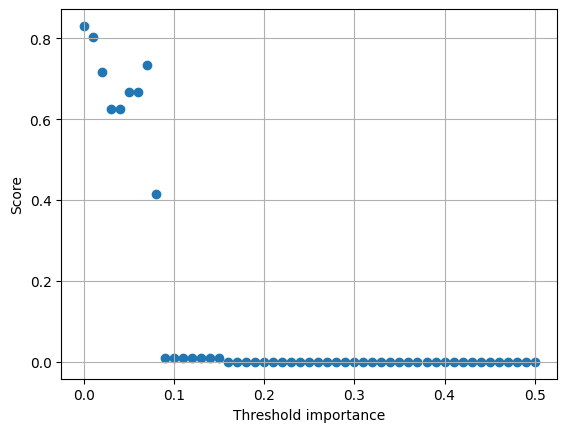

Optimum importance = 0.000
Score = 0.831

Important descriptors for Magnetic moment per unit cell [\mathrm{\mu_B}] using extra trees
------------------------------------------------------------------------------------------
Spin index: 0 - FM, 1 - AFM [dimensionless] (spin_index)
Skew of d electrons [dimensionless] (cmpd_skew_d)
Mean of valence electrons [count] (nvalence_avg)
Standard deviation of d electrons [count] (cmpd_sigma_d)
Mean unpaired electrons [count] (Nup_mean)
Standard deviation of valence electron differences [count] (nvalence_std_dif)
Sum of valence electron differences [count] (nvalence_sum_dif)
Maximum valence electron difference [count] (nvalence_max_dif)
Standard deviation of valence electrons [count] (nvalence_std)
Variance of unpaired electrons [count$^2$] (Nup_var)
Maximum difference of dipole polarizability [\mathrm{\AA}^3] (dipole_max_dif)
Formation energy [eV] (formation_energy)
Sum of ionization energies [eV] (sum_ion)
Mean of dipole polarizability [\mathrm{

In [35]:
optimum_importance_descriptors_magnetic_moment_et = optimum_importance(numeric_df,
                                                                        important_descriptors_magnetic_moment_et,
                                                                        ExtraTreesRegressor(random_state = RANDOM_STATE),
                                                                        magnetic_moment_map["label"])
print_important_descriptors(optimum_importance_descriptors_magnetic_moment_et,
                       column_meaning_map,
                       magnetic_moment_map["label"],
                       "extra trees")

In [36]:
from magnetic_materials_2d.utils import single_descriptor_regression

root mean square error = 0.745 [eV / cell]


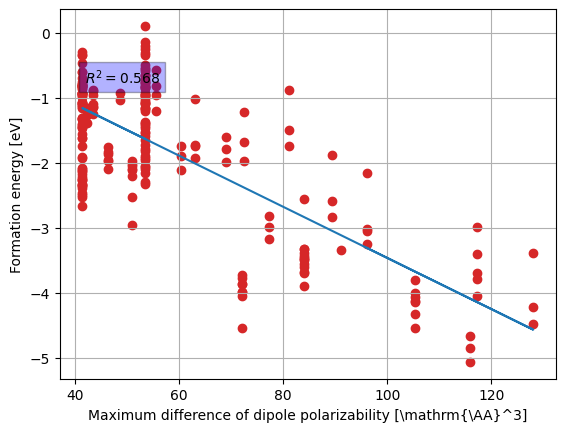

In [37]:
best_descriptor = best_formation_energy_descriptors_linear[0]
single_descriptor_regression(numeric_df, best_descriptor, column_meaning_map,
                             formation_energy_map["unit"],
                             formation_energy_map["label"],
                             LinearRegression())

root mean square error = 0.384 [eV / cell]


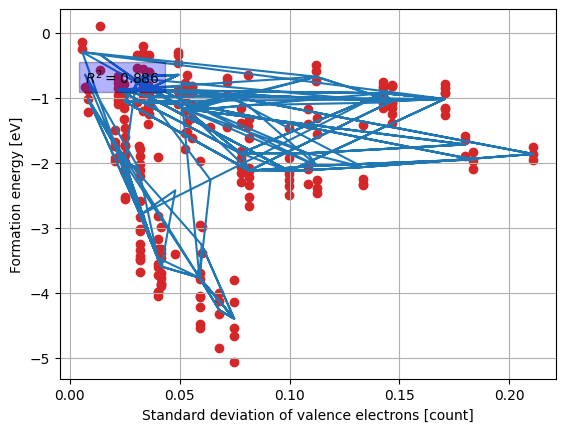

In [38]:
best_descriptor = best_formation_energy_descriptors_rf[0]
single_descriptor_regression(numeric_df, best_descriptor, column_meaning_map,
                             formation_energy_map["unit"],
                             formation_energy_map["label"],
                             RandomForestRegressor(random_state = RANDOM_STATE))

root mean square error = 0.372 [eV / cell]


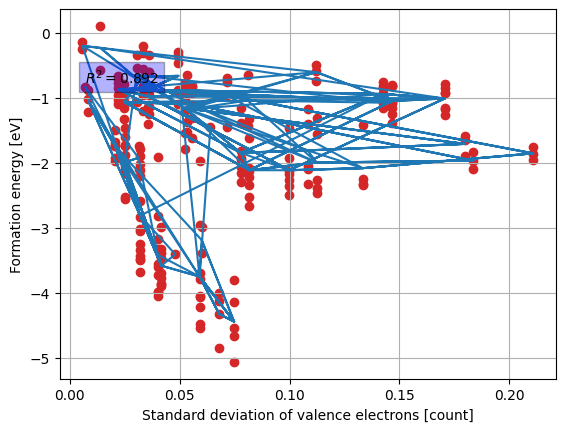

In [39]:
best_descriptor = best_formation_energy_descriptors_et[0]
single_descriptor_regression(numeric_df, best_descriptor, column_meaning_map,
                             formation_energy_map["unit"],
                             formation_energy_map["label"],
                             ExtraTreesRegressor(random_state = RANDOM_STATE))

root mean square error = 0.931 [Bohr magneton / cell]


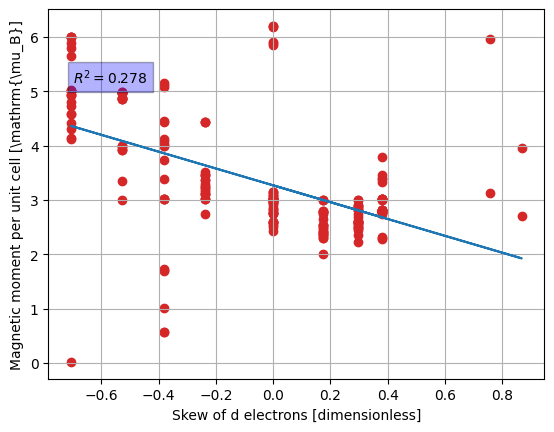

In [40]:
best_descriptor = best_magnetic_moment_descriptors_linear[0]
single_descriptor_regression(numeric_df, best_descriptor, column_meaning_map,
                             magnetic_moment_map["unit"],
                             magnetic_moment_map["label"],
                             LinearRegression())

root mean square error = 0.721 [Bohr magneton / cell]


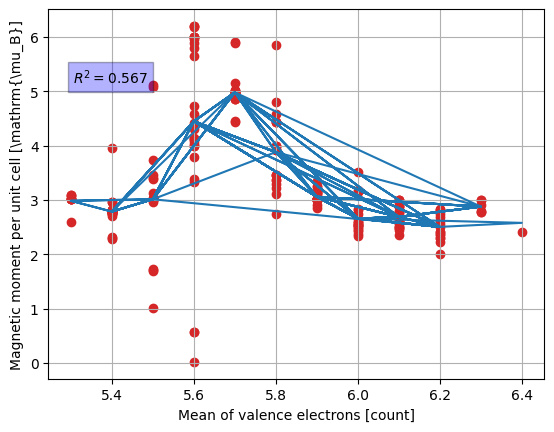

In [41]:
best_descriptor = best_magnetic_moment_descriptors_rf[0]
single_descriptor_regression(numeric_df, best_descriptor, column_meaning_map,
                             magnetic_moment_map["unit"],
                             magnetic_moment_map["label"],
                             RandomForestRegressor(random_state = RANDOM_STATE))

root mean square error = 0.721 [Bohr magneton / cell]


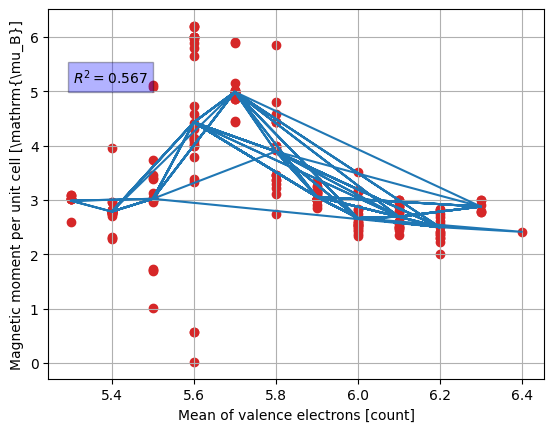

In [42]:
best_descriptor = best_magnetic_moment_descriptors_et[0]
single_descriptor_regression(numeric_df, best_descriptor, column_meaning_map,
                             magnetic_moment_map["unit"],
                             magnetic_moment_map["label"],
                             ExtraTreesRegressor(random_state = RANDOM_STATE))

In [43]:
from magnetic_materials_2d.utils import test_performance

Training: R^2 = 0.964,  MAE = 0.168 [eV / cell]
Test: R^2 = 0.916,  MAE = 0.256 [eV / cell]


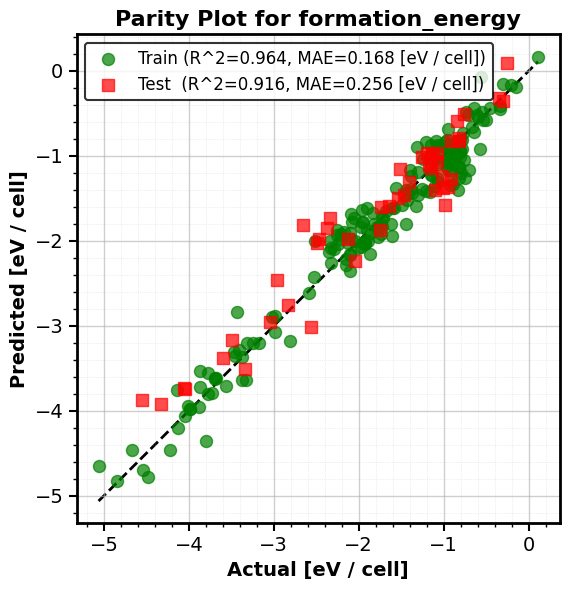

In [44]:
test_performance(numeric_df,
                 best_formation_energy_descriptors_linear,
                 formation_energy_map["unit"],
                 formation_energy_map["label"],
                 LinearRegression())

Training: R^2 = 0.988,  MAE = 0.092 [eV / cell]
Test: R^2 = 0.934,  MAE = 0.230 [eV / cell]


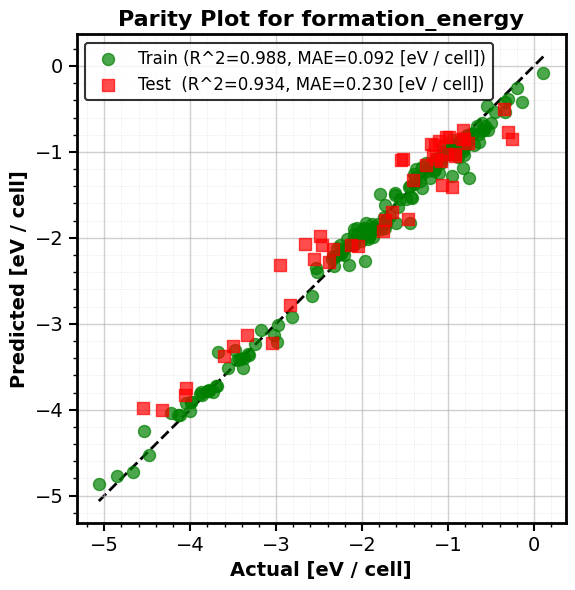

In [45]:
test_performance(numeric_df,
                 best_formation_energy_descriptors_rf,
                 formation_energy_map["unit"],
                 formation_energy_map["label"],
                 RandomForestRegressor(random_state = RANDOM_STATE))

Training: R^2 = 1.000,  MAE = 0.000 [eV / cell]
Test: R^2 = 0.956,  MAE = 0.183 [eV / cell]


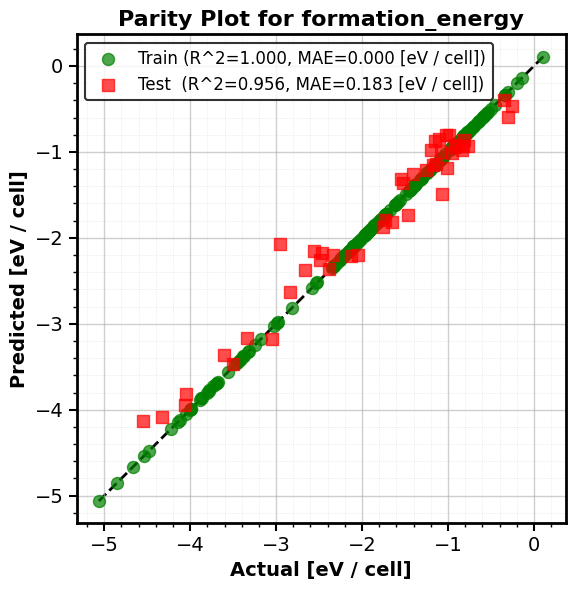

In [46]:
test_performance(numeric_df,
                 best_formation_energy_descriptors_et,
                 formation_energy_map["unit"],
                 formation_energy_map["label"],
                 ExtraTreesRegressor(random_state = RANDOM_STATE))

Training: R^2 = 0.477,  MAE = 0.525 [Bohr magneton / cell]
Test: R^2 = 0.722,  MAE = 0.400 [Bohr magneton / cell]


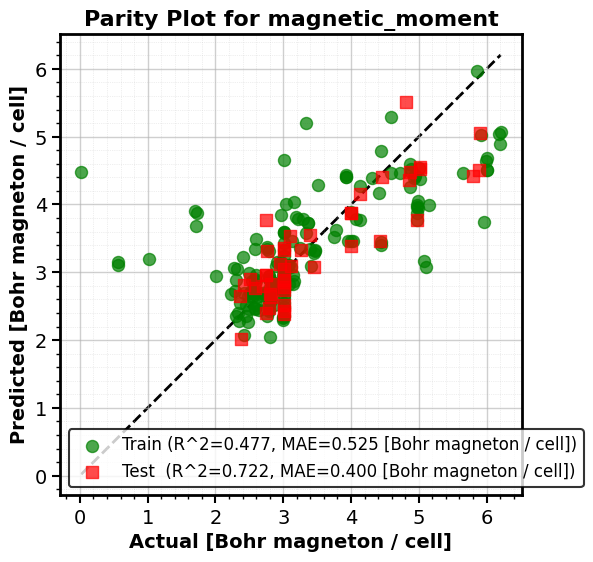

In [47]:
test_performance(numeric_df,
                 best_magnetic_moment_descriptors_linear,
                 magnetic_moment_map["unit"],
                 magnetic_moment_map["label"],
                 LinearRegression())

Training: R^2 = 0.916,  MAE = 0.153 [Bohr magneton / cell]
Test: R^2 = 0.851,  MAE = 0.239 [Bohr magneton / cell]


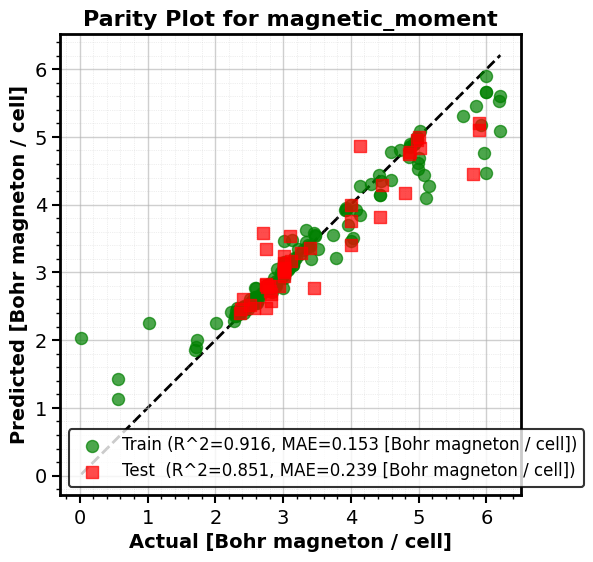

In [48]:
test_performance(numeric_df,
                 best_magnetic_moment_descriptors_rf,
                 magnetic_moment_map["unit"],
                 magnetic_moment_map["label"],
                 RandomForestRegressor(random_state = RANDOM_STATE))

Training: R^2 = 0.998,  MAE = 0.011 [Bohr magneton / cell]
Test: R^2 = 0.851,  MAE = 0.220 [Bohr magneton / cell]


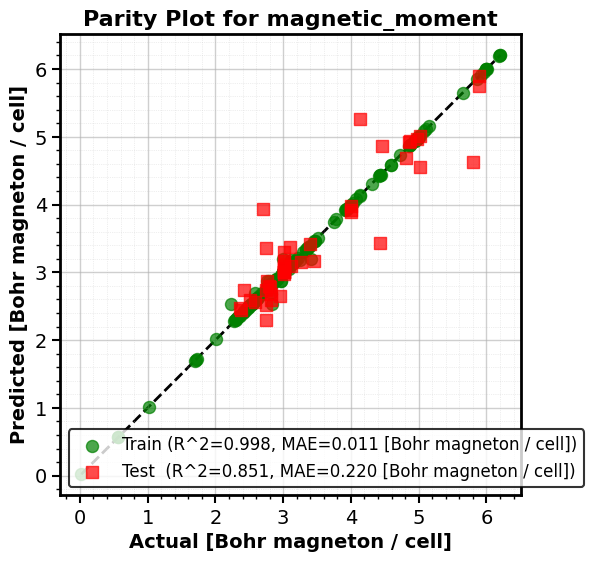

In [49]:
test_performance(numeric_df,
                 best_magnetic_moment_descriptors_et,
                 magnetic_moment_map["unit"],
                 magnetic_moment_map["label"],
                 ExtraTreesRegressor(random_state = RANDOM_STATE))

Notice that RandomForestRegressor() has more than one hyperparameter.
- Do a two-dimensional grid search instead of a one-dimensional grid search as shown above. (Choose an appropriate range of values for each hyperparameter).
- Display your results using plt.imshow()
- Determine the best combination of hyperparameters
- Create a model using the best combination of hyperparameters

In [50]:
from magnetic_materials_2d.hyper_search import best_hyperparameters

Evaluate the following values for max_depth:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
Evaluate the following values for n_estimators:  [  1  26  51  76 101 126 151 176 201 226 251 276]


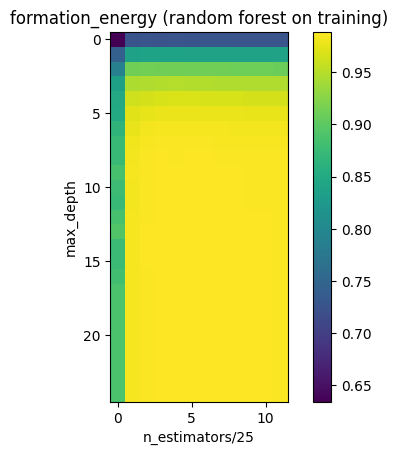

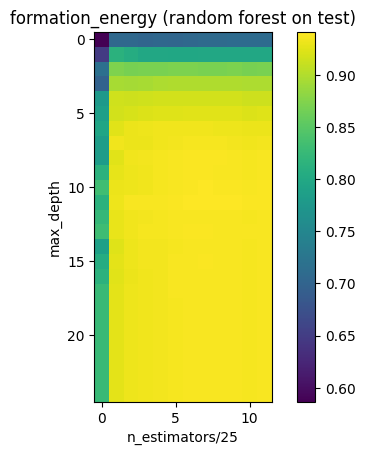

max score = 0.9410299457196211
Best hyperparameter (max_depth, n_estimators): ( 12 , 176 )


In [ ]:
# ==============================================================================
# ~3 minutes to 5 minutes to finish
# ==============================================================================
max_depth, n_estimators = best_hyperparameters(numeric_df,
                                               best_formation_energy_descriptors_rf,
                                               formation_energy_map["label"],
                                               "random forest")

Training: R^2 = 0.987,  MAE = 0.094 [eV / cell]
Test: R^2 = 0.941,  MAE = 0.221 [eV / cell]


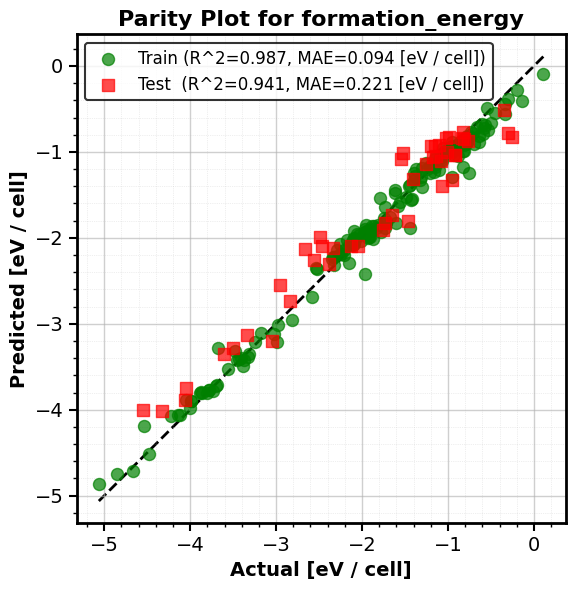

In [52]:
test_performance(numeric_df,
                 best_formation_energy_descriptors_rf,
                 formation_energy_map["unit"],
                 formation_energy_map["label"],
                 RandomForestRegressor(random_state = RANDOM_STATE,
                                       max_depth = max_depth,
                                       n_estimators = n_estimators))

Evaluate the following values for max_depth:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
Evaluate the following values for n_estimators:  [  1  26  51  76 101 126 151 176 201 226 251 276]


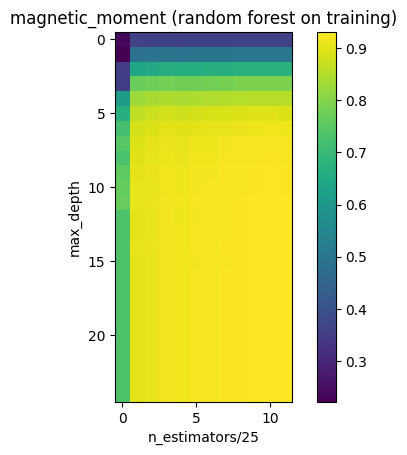

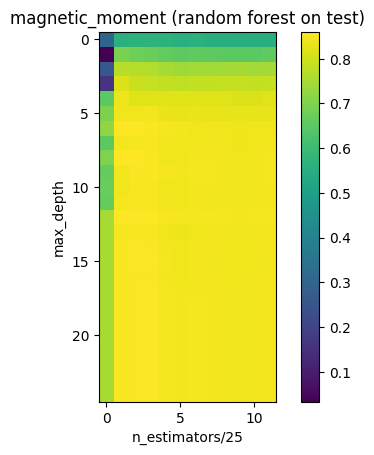

max score = 0.8596343778973919
Best hyperparameter (max_depth, n_estimators): ( 7 , 26 )


In [ ]:
# ==============================================================================
# ~3 minutes to 5 minutes to finish
# ==============================================================================
max_depth, n_estimators = best_hyperparameters(numeric_df,
                                               best_magnetic_moment_descriptors_rf,
                                               magnetic_moment_map["label"],
                                               "random forest")

Training: R^2 = 0.887,  MAE = 0.211 [Bohr magneton / cell]
Test: R^2 = 0.860,  MAE = 0.233 [Bohr magneton / cell]


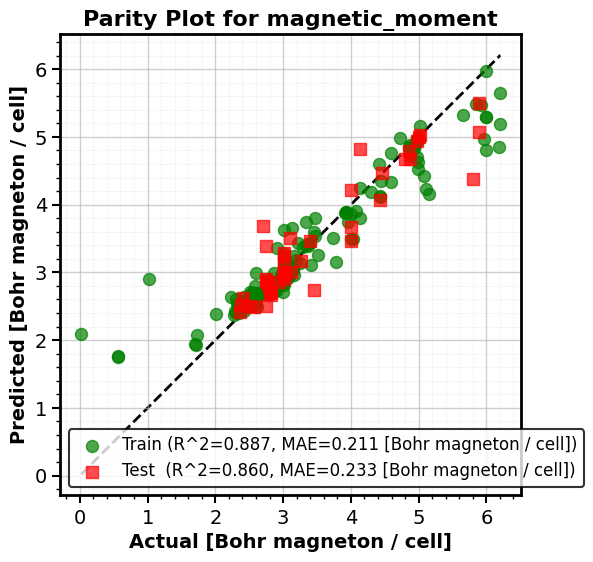

In [54]:
test_performance(numeric_df,
                 best_magnetic_moment_descriptors_rf,
                 magnetic_moment_map["unit"],
                 magnetic_moment_map["label"],
                 RandomForestRegressor(random_state = RANDOM_STATE,
                                       max_depth = max_depth,
                                       n_estimators = n_estimators))

Evaluate the following values for max_depth:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
Evaluate the following values for n_estimators:  [  1  26  51  76 101 126 151 176 201 226 251 276]


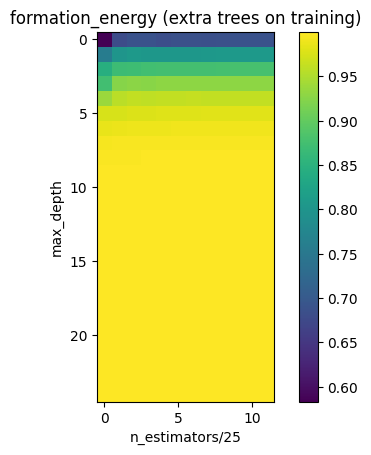

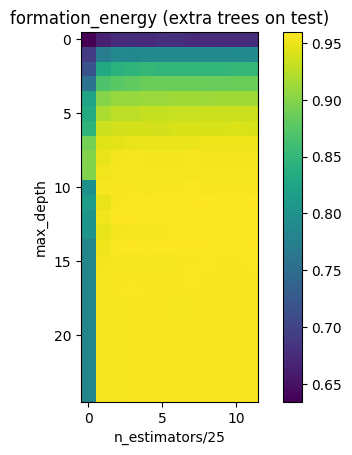

max score = 0.959631912049471
Best hyperparameter (max_depth, n_estimators): ( 13 , 76 )


In [ ]:
# ==============================================================================
# ~3 minutes to 5 minutes to finish
# ==============================================================================
max_depth, n_estimators = best_hyperparameters(numeric_df,
                                               best_formation_energy_descriptors_et,
                                               formation_energy_map["label"],
                                               "extra trees")

Training: R^2 = 1.000,  MAE = 0.002 [eV / cell]
Test: R^2 = 0.960,  MAE = 0.176 [eV / cell]


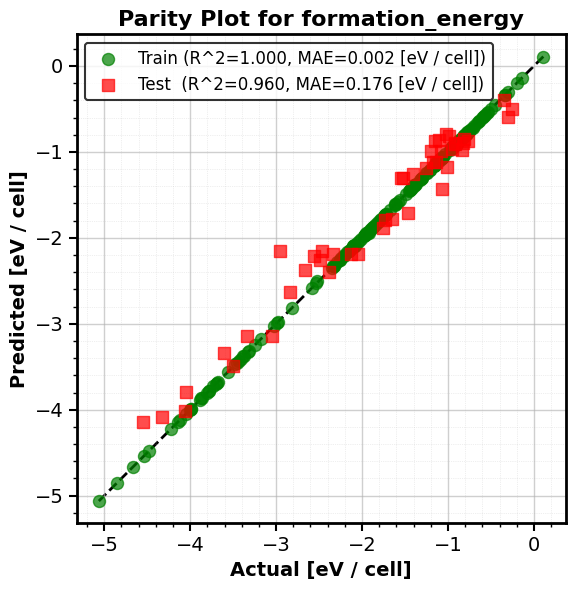

In [56]:
test_performance(numeric_df,
                 best_formation_energy_descriptors_et,
                 formation_energy_map["unit"],
                 formation_energy_map["label"],
                 ExtraTreesRegressor(random_state = RANDOM_STATE,
                                       max_depth = max_depth,
                                       n_estimators = n_estimators))

Evaluate the following values for max_depth:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
Evaluate the following values for n_estimators:  [  1  26  51  76 101 126 151 176 201 226 251 276]


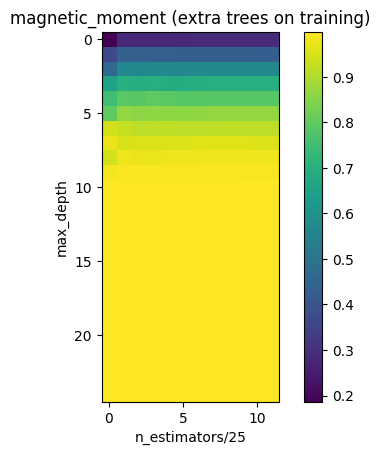

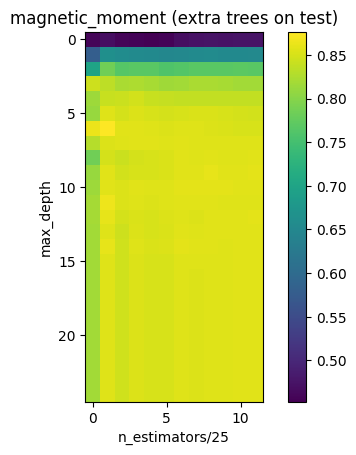

max score = 0.8763751033526399
Best hyperparameter (max_depth, n_estimators): ( 7 , 26 )


In [57]:
# ==============================================================================
# ~3 minutes to 5 minutes to finish
# ==============================================================================
max_depth, n_estimators = best_hyperparameters(numeric_df,
                                               best_magnetic_moment_descriptors_et,
                                               magnetic_moment_map["label"],
                                               "extra trees")

Training: R^2 = 0.926,  MAE = 0.154 [Bohr magneton / cell]
Test: R^2 = 0.876,  MAE = 0.210 [Bohr magneton / cell]


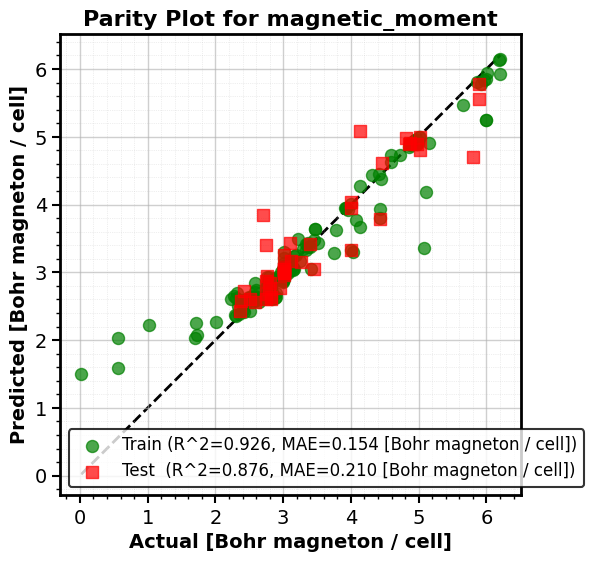

In [58]:
test_performance(numeric_df,
                 best_magnetic_moment_descriptors_et,
                 magnetic_moment_map["unit"],
                 magnetic_moment_map["label"],
                 ExtraTreesRegressor(random_state = RANDOM_STATE,
                                       max_depth = max_depth,
                                       n_estimators = n_estimators))

=====================================================================================

CONGRATULATIONS!!! 👏

You've completed the exercises and are well on your way to becoming an expert in materials informatics.